# Animation of the geographic earth with CO2 emission per country (1960-2014)   

## The animation of the geographic earth is created following https://medium.com/udacity/creating-map-animations-with-python-97e24040f17b

In [226]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pandas as pd 
import cartopy.crs as ccrs
import numpy as np
import os
import cartopy


In [227]:
#Data from https://data.worldbank.org/indicator/EN.ATM.CO2E.PP.GD.KD
df = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10474024.csv", sep=",", skiprows=4)
print(df.shape)
df.head()


(264, 64)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN


In [23]:
#print number of NAs per column
for column in df:
    print("{}\t{}".format(column, df[column].isnull().sum()))

Country Name	0
Country Code	0
Indicator Name	0
Indicator Code	0
1960	72
1961	71
1962	69
1963	68
1964	61
1965	61
1966	61
1967	61
1968	61
1969	61
1970	59
1971	58
1972	56
1973	56
1974	56
1975	56
1976	56
1977	56
1978	56
1979	56
1980	56
1981	56
1982	56
1983	56
1984	56
1985	56
1986	55
1987	55
1988	55
1989	55
1990	49
1991	47
1992	23
1993	23
1994	22
1995	21
1996	21
1997	20
1998	19
1999	19
2000	19
2001	19
2002	18
2003	18
2004	18
2005	17
2006	16
2007	15
2008	15
2009	15
2010	15
2011	15
2012	13
2013	13
2014	14
2015	264
2016	264
2017	264
2018	264
Unnamed: 63	264


In [4]:
#get Nas for rows (country)
df.isnull().sum(axis=1)


0      31
1       5
2       5
3       5
4      35
5       5
6       5
7       5
8      37
9      60
10      5
11      5
12      5
13     37
14      7
15      5
16      5
17      5
18     17
19      5
20      5
21      5
22     37
23     37
24      5
25      5
26      5
27      5
28      5
29      5
       ..
234     5
235    47
236     5
237     5
238     5
239     5
240     5
241     5
242     5
243    35
244     5
245     5
246    37
247     5
248     5
249     5
250    37
251     5
252     5
253     7
254    60
255     5
256     7
257     5
258     5
259    60
260     5
261     5
262     9
263     9
Length: 264, dtype: int64

In [228]:
df = df.iloc[:,:-5].copy()
df.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.200708,26.948260,27.895574,26.230847,25.915833,24.670529,24.505835,13.155542,8.351294,8.408363
1,Afghanistan,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,0.107637,0.123734,0.115498,...,0.052948,0.063728,0.085418,0.154101,0.241723,0.293837,0.412017,0.350371,0.315602,0.299445
2,Angola,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,0.246413,0.154912,0.256316,...,0.979740,1.098884,1.197844,1.181527,1.232495,1.243406,1.252789,1.330843,1.254617,1.291328
3,Albania,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.299872,6.746219,6.519466,6.427887,6.121652,6.122595,5.867130,5.916597,5.900753,5.832170


In [229]:
# Get dataset with longitude and latitude from:
# https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv
loc_countries = pd.read_csv("countries.csv", sep=",")
loc_countries = loc_countries[["Country", "Latitude", "Longitude"]]

# Merge df with the locations
df.rename({"Country Name": "Country"}, inplace=True, axis=1)
df = df.merge(loc_countries, how="right", on="Country")

df = df[["Country", "1960", "Longitude", "Latitude"]]

In [222]:
years = list(df.columns)
years.remove("Country")
years.remove("Latitude")
years.remove("Longitude")
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


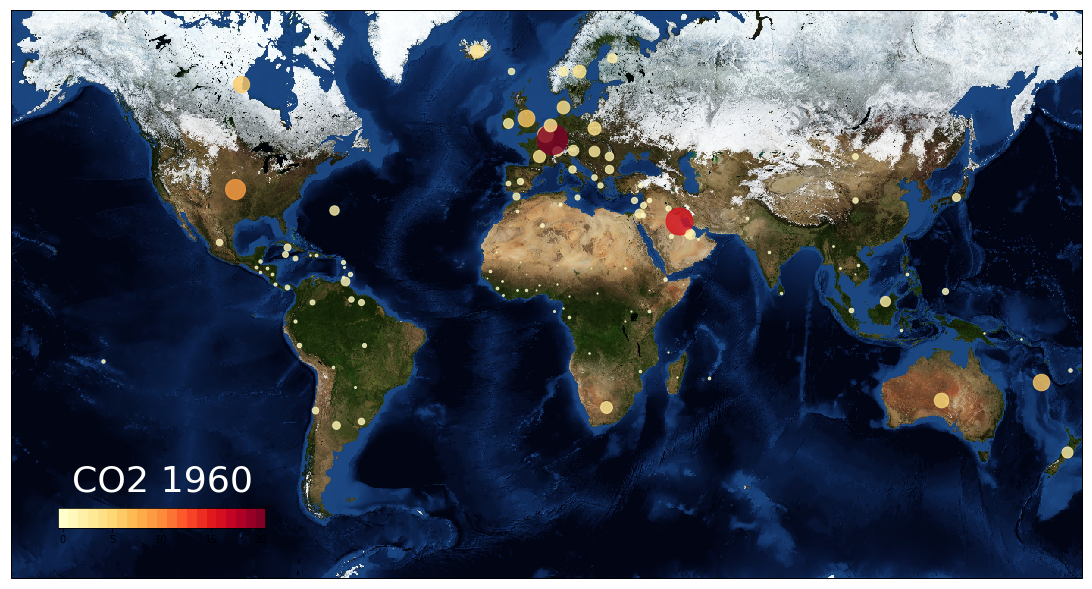

In [236]:
#Generate just one image

fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                       min_latitude=-65,
                                       max_latitude=70))

#Set as backgorund the NASA digital image of the earth from Blue Marble
ax.background_img(name='ne_shaded', resolution='low')
ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())

cmap = plt.cm.YlOrRd
minimun = df["1960"].min()
maximun = df["1960"].max()
norm = matplotlib.colors.Normalize(vmin=minimun, vmax=maximun)

for row in df.itertuples(index=False):
    ax.scatter(row[2], row[3], s=row[1]*25,
               color=cmap(norm(row[1])), alpha=0.8,
               transform=ccrs.PlateCarree())


fontname = 'Open Sans'
fontsize = 28

#create color gradient
m = np.zeros((1,21))
for i in range(21):
    if i == 20:
        m[0,i] = 100
    m[0,i] = (i*5)/100.0

ax2 = plt.axes([0.159, 0.14, 0.15, 0.15])
ax2.imshow(m, cmap='YlOrRd', aspect=2)
ax2.set_yticks(np.arange(0))
ax2.set_xticks(np.arange(0,25,5), [0,25,50,75,100])
#ax2.tick_params(length=6, width=2, colors='white',
               #grid_color='white', grid_alpha=0.5)


# Positions for the date and grad counter
date_x = -150
date_y = -50
date_spacing = 65

# Date text
ax.text(date_x, date_y, 
        "CO2 "+"1960",
        color='white',
        fontname=fontname, fontsize=fontsize*1.3,
        transform=ccrs.PlateCarree())

plt.show()
fig.savefig("1960.png", dpi=100,     
            frameon=False, facecolor='black')
ax.clear()